# Задание 1

Возьмите датасет Mortality and Water Hardness**
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

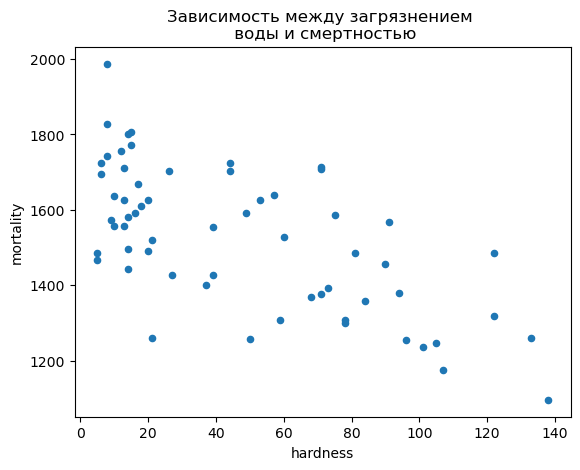

Коэффициент корреляции Пирсона:


,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Коэффициент корреляции Спирмена:


,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Уравнение прямой предсказания: y = -3.056511665408944x + 1665.931505644395


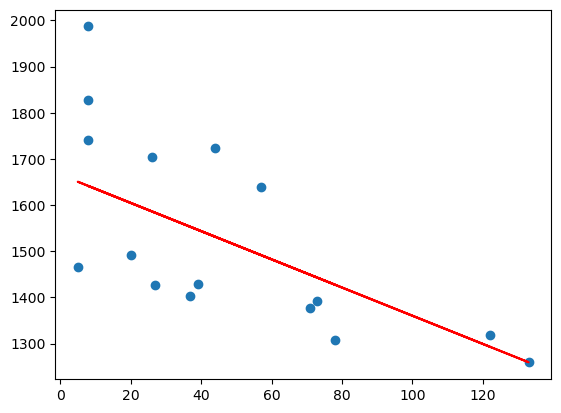

Коэффициент детерминации: 0.45536501995527645


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

waterAll = pd.read_csv(r'water.csv', usecols=['location', 'mortality', 'hardness'])


def task_for_df(water):
    water.plot(kind='scatter',
              x='hardness',
              y='mortality',
              title='Зависимость между загрязнением \n воды и смертностью')

    plt.show()
    
    print('Коэффициент корреляции Пирсона:')
    display(water.corr())
    
    print('Коэффициент корреляции Спирмена:')
    display(water.corr(method='spearman'))
    
    X_train, X_test, y_train, y_test = train_test_split(water[['hardness']], water.mortality, random_state=7)

    model = LinearRegression()
    model.fit(X_train, y_train) 

    print(f'Уравнение прямой предсказания: y = {model.coef_[0]}x + {model.intercept_}')

    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, c='r')
    plt.title = 'Зависимость между загрязнением \n воды и смертностью \n c прямой предсказания'
    plt.show()
    
    print(f'Коэффициент детерминации: {model.score(X_test, y_test)}')
    
task_for_df(waterAll)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     30.38
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.87e-06
Time:                        15:34:27   Log-Likelihood:                -285.18
No. Observations:                  45   AIC:                             574.4
Df Residuals:                      43   BIC:                             578.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1665.9315     33.451     49.801      0.0

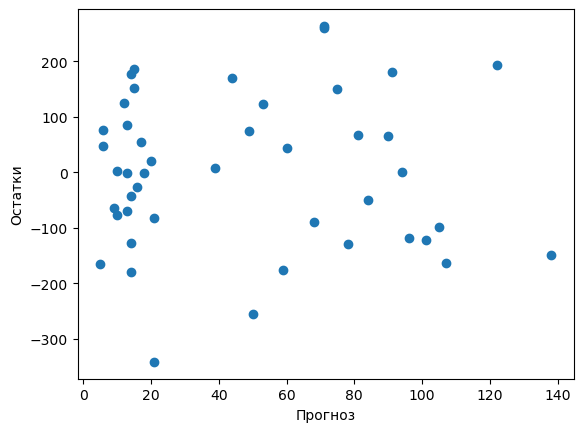

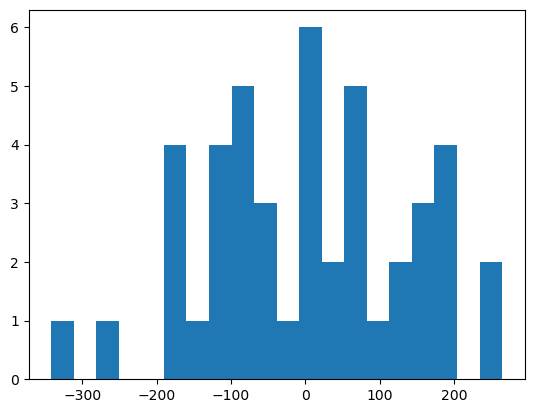

In [26]:
# Альтернативный способ из statsmodel

def task_for_df_withConst(water):
    # Альтернативный способ из statsmodel
    
    X_train, X_test, y_train, y_test = train_test_split(water[['hardness']], water.mortality, random_state=7)
    
    X_const = sm.add_constant(X_train)
    modelSm = sm.OLS(y_train, X_const)
    results = modelSm.fit()
    print(results.summary())
    
    print('Parameters: ', results.params)
    print('R2: ', results.rsquared)
    
    # посмотрим на остатки
    plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
    plt.xlabel('Прогноз')
    plt.ylabel('Остатки')
    plt.show()
    
    plt.hist(results.resid, bins=20)
    plt.show()
    
task_for_df_withConst(waterAll)

# Задание 2

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

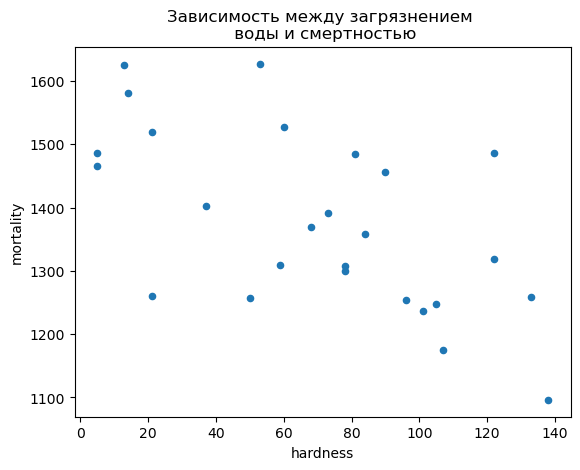

Коэффициент корреляции Пирсона:


,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


Коэффициент корреляции Спирмена:


,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Уравнение прямой предсказания: y = -2.567112479760172x + 1567.7836904562496


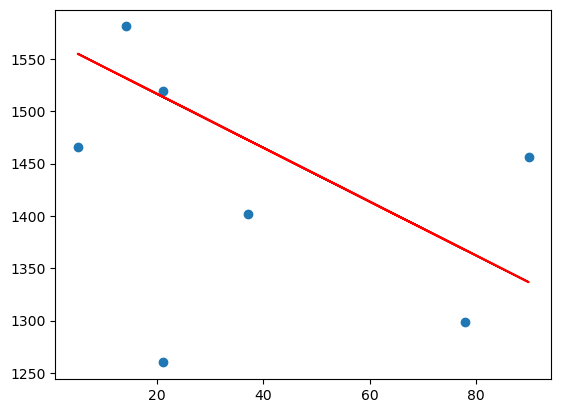

Коэффициент детерминации: -0.24303469222041518


In [19]:
waterSouth = waterAll[waterAll.location == 'South']
task_for_df(waterSouth)

In [ ]:
task_for_df_withConst(waterSouth)

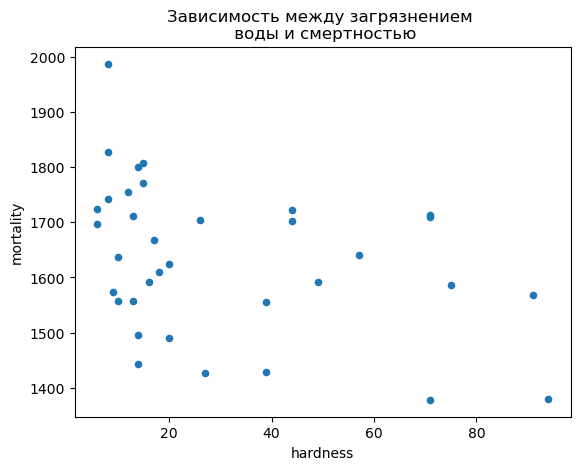

Коэффициент корреляции Пирсона:


,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


Коэффициент корреляции Спирмена:


,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Уравнение прямой предсказания: y = -2.1242237917819073x + 1713.5112345425039


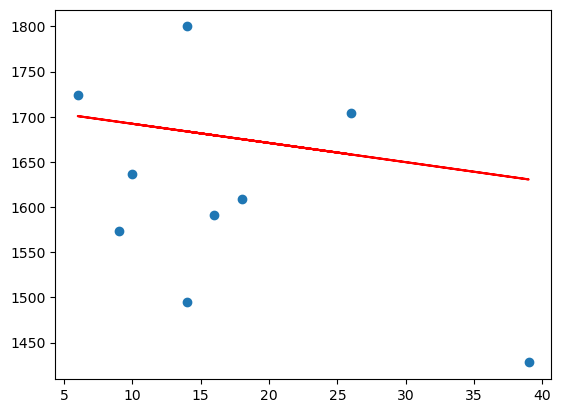

Коэффициент детерминации: -0.15584196826031516


In [27]:
waterNorth = waterAll[waterAll.location == 'North']
task_for_df(waterNorth)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     4.999
Date:                Fri, 09 Jun 2023   Prob (F-statistic):             0.0349
Time:                        15:35:20   Log-Likelihood:                -163.39
No. Observations:                  26   AIC:                             330.8
Df Residuals:                      24   BIC:                             333.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1713.5112     42.562     40.259      0.0

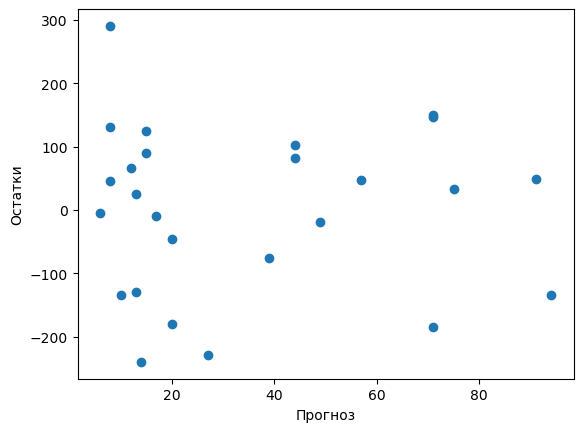

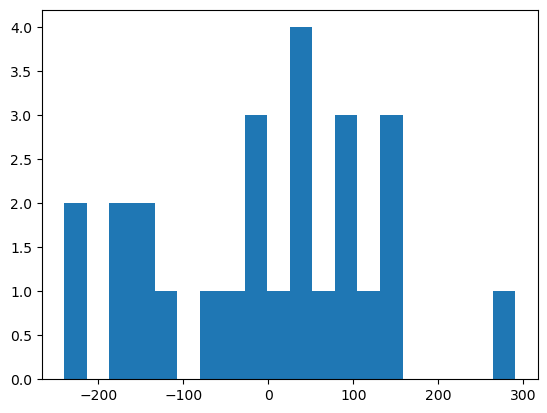

In [28]:
task_for_df_withConst(waterNorth)

Вывод - можель на полных данных полчилась лучше, чем можели на отдельных регионах. Вероятно это из за большнго количества данных в полной модели.